In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
df = pd.read_csv('Iris_d.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = df.iloc[:,:4].values
y = df['Species'].values
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

[[12  0  0]
 [ 0 11  0]
 [ 0  1 14]]


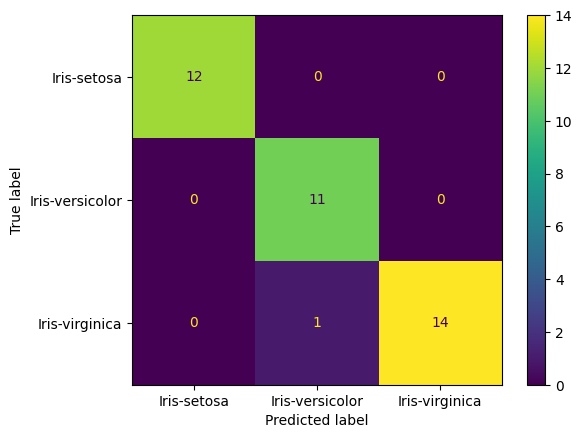

In [ ]:
cm_d =metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=df['Species'].unique())
cm_d.plot()

In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# In binary classification, where there are only two classes (e.g., positive and negative), 
# precision is calculated directly without using the average parameter. However, 
# in multi-class classification, where there are more than two classes, the precision can be computed in different ways.

# micro = This calculates the precision globally by considering all classes together. It sums up the true positives and false positives 
# across all classes and computes the precision using these aggregated values.
print("Accuray score ",metrics.accuracy_score(y_test,y_pred))
print("Precision score ",metrics.precision_score(y_test,y_pred,average='micro'))
print("Recall score ",metrics.recall_score(y_test,y_pred,average='micro'))

Accuray score  0.9736842105263158
Precision score  0.9736842105263158
Recall score  0.9736842105263158


In [ ]:
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

